In [1]:
#https://openweathermap.org/current

In [2]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests as req
from datetime import datetime
import time
from scipy.stats import linregress

# Import the API key.
from config import weather_api_key

In [3]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [4]:
# Create a set of random latitude and longitude combinations.
coords = [(i,j) for i in np.random.uniform(low=-90.000, high=90.000, size=50)
          for j in np.random.uniform(low=-90.000, high=90.000, size=50)]

In [5]:
# Use the tuple() function to display the latitude and longitude combinations.
#for i in coords:
#    print(citipy.nearest_city(i[0], i[1]).city_name,
#          citipy.nearest_city(i[0], i[1]).country_code)

In [11]:
#cities = {(citipy.nearest_city(coordinate[0], coordinate[1]).city_name) for i in coordinates}
# Create a list for holding the cities.
lowercase = list({citipy.nearest_city(i[0], i[1]).city_name for i in coords})

In [108]:
# Identify the nearest city for each latitude and longitude combination.
cities = [i.capitalize() for i in lowercase]
len(cities)

949

In [109]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [110]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = req.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | Ati
Processing Record 2 of Set 1 | Rio gallegos
Processing Record 3 of Set 1 | Mao
Processing Record 4 of Set 1 | Tanout
Processing Record 5 of Set 1 | Vilhena
Processing Record 6 of Set 1 | Bielsk podlaski
Processing Record 7 of Set 1 | Santo antonio de jesus
Processing Record 8 of Set 1 | Yarada
Processing Record 9 of Set 1 | Bonneville
Processing Record 10 of Set 1 | Nakuru
Processing Record 11 of Set 1 | Joshimath
Processing Record 12 of Set 1 | South venice
Processing Record 13 of Set 1 | Salamanca
Processing Record 14 of Set 1 | Winsum
Processing Record 15 of Set 1 | Koscierzyna
Processing Record 16 of Set 1 | Requena
Processing Record 17 of Set 1 | Yekaterinogradskaya
Processing Record 18 of Set 1 | Morales
Processing Record 19 of Set 1 | Rio de jesus
Processing Record 20 of Set 1 | Lyantonde
Processing Record 21 of Set 1 | Berlevag
Processing Record 22 of Set 1 | Gurgan
City not found. Sk

Processing Record 40 of Set 4 | Lagoa
Processing Record 41 of Set 4 | Roros
Processing Record 42 of Set 4 | Ankazoabo
Processing Record 43 of Set 4 | Crotone
Processing Record 44 of Set 4 | Luba
Processing Record 45 of Set 4 | Victoria
Processing Record 46 of Set 4 | Dinsor
City not found. Skipping...
Processing Record 47 of Set 4 | Riyadh
Processing Record 48 of Set 4 | Jacareacanga
Processing Record 49 of Set 4 | Aguimes
Processing Record 50 of Set 4 | Mullaitivu
City not found. Skipping...
Processing Record 1 of Set 5 | Klaksvik
Processing Record 2 of Set 5 | Hwange
Processing Record 3 of Set 5 | El balyana
City not found. Skipping...
Processing Record 4 of Set 5 | Itigi
Processing Record 5 of Set 5 | Boueni
Processing Record 6 of Set 5 | Hasanabad
Processing Record 7 of Set 5 | Alindao
Processing Record 8 of Set 5 | Nargana
Processing Record 9 of Set 5 | Uvat
Processing Record 10 of Set 5 | Paoua
Processing Record 11 of Set 5 | Vincennes
Processing Record 12 of Set 5 | Bull savanna

Processing Record 32 of Set 8 | Revelganj
Processing Record 33 of Set 8 | Carnarvon
Processing Record 34 of Set 8 | Wana
Processing Record 35 of Set 8 | Sao filipe
Processing Record 36 of Set 8 | Nsoko
Processing Record 37 of Set 8 | Lokosovo
Processing Record 38 of Set 8 | Gumdag
Processing Record 39 of Set 8 | Vredendal
Processing Record 40 of Set 8 | Kuytun
Processing Record 41 of Set 8 | Kasongo-lunda
Processing Record 42 of Set 8 | Aksarka
Processing Record 43 of Set 8 | Karasjok
Processing Record 44 of Set 8 | Urdzhar
City not found. Skipping...
Processing Record 45 of Set 8 | Ahlat
Processing Record 46 of Set 8 | Caravelas
Processing Record 47 of Set 8 | Borba
Processing Record 48 of Set 8 | Russkaya polyana
Processing Record 49 of Set 8 | Dolbeau
City not found. Skipping...
Processing Record 50 of Set 8 | Kortkeros
Processing Record 1 of Set 9 | Lopatino
Processing Record 2 of Set 9 | Butzow
Processing Record 3 of Set 9 | Sosnogorsk
Processing Record 4 of Set 9 | Kargasok
Proce

Processing Record 16 of Set 12 | Florianopolis
Processing Record 17 of Set 12 | Diego de almagro
Processing Record 18 of Set 12 | Os
City not found. Skipping...
Processing Record 19 of Set 12 | Lethem
Processing Record 20 of Set 12 | Tortoli
Processing Record 21 of Set 12 | Porto santo
Processing Record 22 of Set 12 | Mutare
Processing Record 23 of Set 12 | Road town
Processing Record 24 of Set 12 | Jamestown
Processing Record 25 of Set 12 | Skiros
City not found. Skipping...
Processing Record 26 of Set 12 | Nortelandia
Processing Record 27 of Set 12 | Dikson
Processing Record 28 of Set 12 | Beloha
Processing Record 29 of Set 12 | Altay
Processing Record 30 of Set 12 | Ozerki
Processing Record 31 of Set 12 | Juba
Processing Record 32 of Set 12 | Madimba
Processing Record 33 of Set 12 | Camopi
Processing Record 34 of Set 12 | Rurrenabaque
Processing Record 35 of Set 12 | Lom
Processing Record 36 of Set 12 | Turukhansk
Processing Record 37 of Set 12 | Vyshkov
Processing Record 38 of Set 

Processing Record 4 of Set 16 | Babanusah
City not found. Skipping...
Processing Record 5 of Set 16 | Laranjeiras do sul
Processing Record 6 of Set 16 | Porto nacional
Processing Record 7 of Set 16 | Taltal
Processing Record 8 of Set 16 | Tank
Processing Record 9 of Set 16 | Hambantota
Processing Record 10 of Set 16 | Kochkurovo
Processing Record 11 of Set 16 | Paptalaya
Processing Record 12 of Set 16 | Lieksa
Processing Record 13 of Set 16 | Kushmurun
Processing Record 14 of Set 16 | La macarena
Processing Record 15 of Set 16 | Taolanaro
City not found. Skipping...
Processing Record 16 of Set 16 | Dubrovka
Processing Record 17 of Set 16 | Nsukka
Processing Record 18 of Set 16 | Rincon
Processing Record 19 of Set 16 | Yirol
City not found. Skipping...
Processing Record 20 of Set 16 | Yafran
Processing Record 21 of Set 16 | Uthal
Processing Record 22 of Set 16 | Torbay
Processing Record 23 of Set 16 | Liverpool
Processing Record 24 of Set 16 | Saint-philippe
Processing Record 25 of Set 

Processing Record 41 of Set 19 | Krutikha
Processing Record 42 of Set 19 | Longyearbyen
Processing Record 43 of Set 19 | Manjacaze
Processing Record 44 of Set 19 | Camapua
Processing Record 45 of Set 19 | Perry
Processing Record 46 of Set 19 | Kharitonovo
Processing Record 47 of Set 19 | Lerwick
Processing Record 48 of Set 19 | Scunthorpe
Processing Record 49 of Set 19 | Sao joao da barra
-----------------------------
Data Retrieval Complete      
-----------------------------


In [111]:
len(city_data)

876

In [112]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
col_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
cityData = city_data_df[col_order]
cityData.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ati,TD,2021-09-10 03:53:40,13.2154,18.3353,76.42,77,100,9.04
1,Rio Gallegos,AR,2021-09-10 03:53:40,-51.6226,-69.2181,33.85,80,0,3.44
2,Mao,ES,2021-09-10 03:53:40,39.8885,4.2658,73.96,94,0,4.61
3,Tanout,NE,2021-09-10 03:50:06,14.9709,8.8879,84.29,51,100,8.63
4,Vilhena,BR,2021-09-10 03:53:41,-12.7406,-60.1458,68.09,95,89,3.13
5,Bielsk Podlaski,PL,2021-09-10 03:53:41,52.7651,23.1865,47.25,75,16,6.20
6,Santo Antonio De Jesus,BR,2021-09-10 03:53:41,-12.9689,-39.2614,63.14,98,4,1.19
7,Yarada,IN,2021-09-10 03:53:42,17.6500,83.2667,82.72,100,90,5.75
8,Bonneville,FR,2021-09-10 03:53:42,46.0802,6.4073,66.58,76,100,3.22
9,Nakuru,KE,2021-09-10 03:53:42,-0.2833,36.0667,56.66,90,98,5.10


In [113]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
cityData.to_csv(output_data_file, index_label="City_ID")

In [114]:
# Extract relevant fields from the DataFrame for plotting.
lats = cityData["Lat"]
max_temps = cityData["Max Temp"]
humidity = cityData["Humidity"]
cloudiness = cityData["Cloudiness"]
wind_speed = cityData["Wind Speed"]

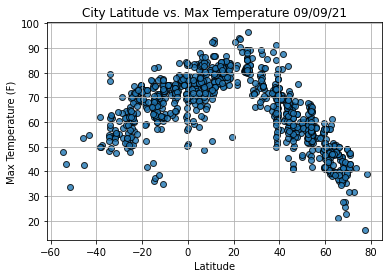

In [115]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

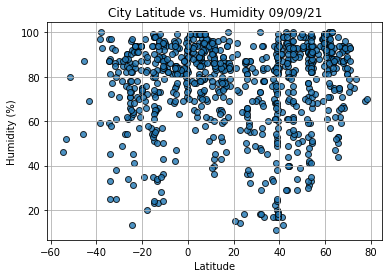

In [116]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

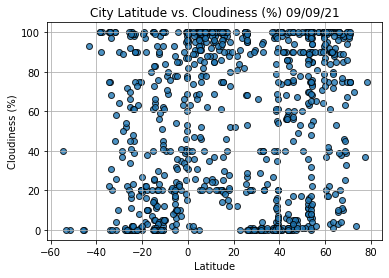

In [117]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

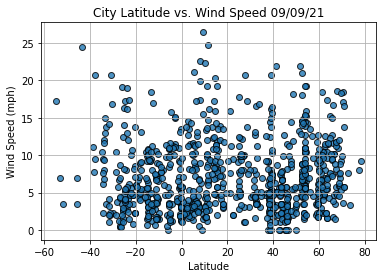

In [118]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [119]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coords1,text_coords2):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coords1, fontsize=10, color="red")
    plt.annotate(r_value, text_coords2, fontsize=10, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [120]:
cityData.loc[(cityData["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ati,TD,2021-09-10 03:53:40,13.2154,18.3353,76.42,77,100,9.04
2,Mao,ES,2021-09-10 03:53:40,39.8885,4.2658,73.96,94,0,4.61
3,Tanout,NE,2021-09-10 03:50:06,14.9709,8.8879,84.29,51,100,8.63
5,Bielsk Podlaski,PL,2021-09-10 03:53:41,52.7651,23.1865,47.25,75,16,6.20
7,Yarada,IN,2021-09-10 03:53:42,17.6500,83.2667,82.72,100,90,5.75


In [121]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = cityData.loc[(cityData["Lat"] >= 0)]
southern_hemi_df = cityData.loc[(cityData["Lat"] < 0)]

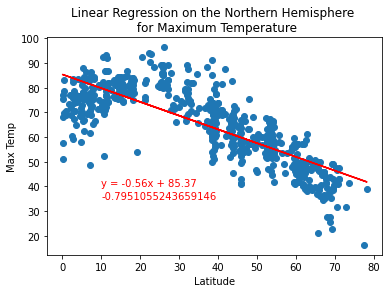

In [122]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(10,40),(10,35))


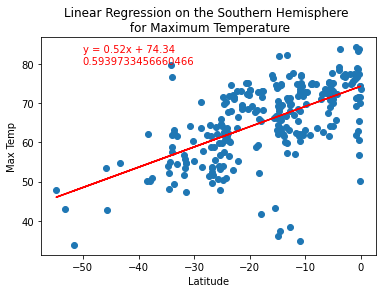

In [123]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,83),(-50,80))

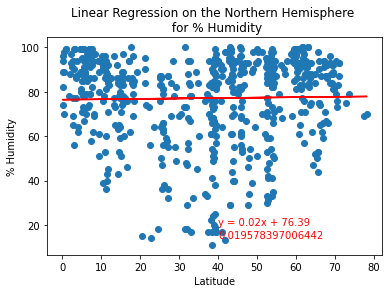

In [124]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,20),(40,14))

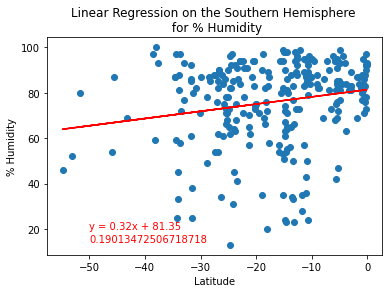

In [125]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,20),(-50,14))

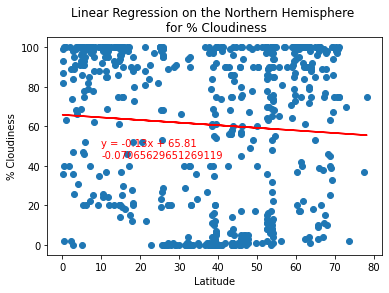

In [128]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', '% Cloudiness',(10,50),(10,44))

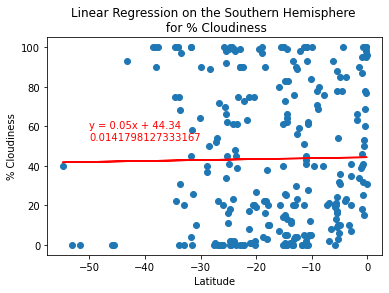

In [132]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,59),(-50,53))

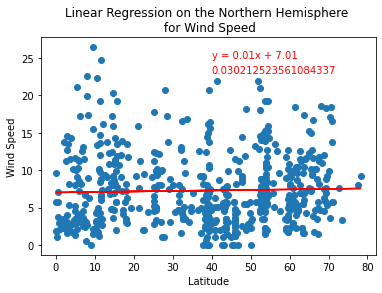

In [138]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,25),(40,23))

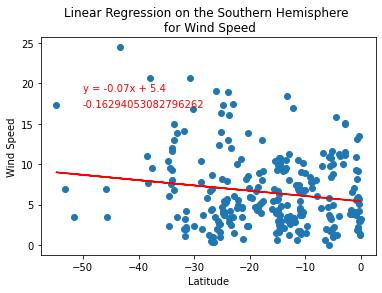

In [143]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,19),(-50,17))